In [18]:
# !python -m pip install --upgrade pip
# !python -m pip install git+https://github.com/AbnerErnaniADSFatec/eocubes
# !python -m pip install git+https://github.com/brazil-data-cube/wlts.py@b-0.6
# !python -m pip install ipywidgets

In [21]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import wlts
import datetime
%matplotlib inline

from eocube import DataCube, Image, info, config

config.ACCESS_TOKEN = "a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV"
service_wlts = wlts.WLTS('https://brazildatacube.dpi.inpe.br/wlts/')

In [2]:
%%time
eodatacube = DataCube(
    collections=["CB4_64_16D_STK-1"],
    query_bands=['red', 'green', 'blue', 'nir'],
    bbox=[-54.9974524, -11.0307002, -52.4090252, -12.9842280],
    start_date="2018-01-01",
    end_date="2021-01-01",
    limit=50
)

CPU times: user 357 ms, sys: 51.3 ms, total: 408 ms
Wall time: 10.9 s


In [3]:
nir = eodatacube.select(band="nir",time="2020-08-21")

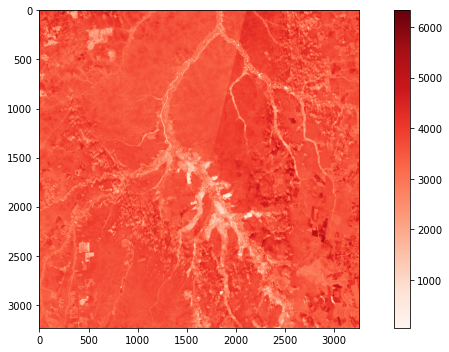

In [4]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Reds', 1000)
plt.imshow(
    nir.values[0],
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

In [7]:
eodatacube.data_images

{datetime.datetime(2021, 1, 1, 0, 0): <eocube.image.Image at 0x7fb23a7e2820>,
 datetime.datetime(2020, 12, 18, 0, 0): <eocube.image.Image at 0x7fb23a7e22b0>,
 datetime.datetime(2020, 12, 2, 0, 0): <eocube.image.Image at 0x7fb23a7e2e20>,
 datetime.datetime(2020, 11, 16, 0, 0): <eocube.image.Image at 0x7fb25dd13160>,
 datetime.datetime(2020, 10, 31, 0, 0): <eocube.image.Image at 0x7fb25dd13460>,
 datetime.datetime(2020, 10, 15, 0, 0): <eocube.image.Image at 0x7fb25dd13760>,
 datetime.datetime(2020, 9, 29, 0, 0): <eocube.image.Image at 0x7fb25dd13a60>,
 datetime.datetime(2020, 9, 13, 0, 0): <eocube.image.Image at 0x7fb25dd13d60>,
 datetime.datetime(2020, 8, 28, 0, 0): <eocube.image.Image at 0x7fb25dd160a0>,
 datetime.datetime(2020, 8, 12, 0, 0): <eocube.image.Image at 0x7fb25dd163a0>,
 datetime.datetime(2020, 7, 27, 0, 0): <eocube.image.Image at 0x7fb25dd16760>,
 datetime.datetime(2020, 7, 11, 0, 0): <eocube.image.Image at 0x7fb25dd16a60>,
 datetime.datetime(2020, 6, 25, 0, 0): <eocube.im

In [18]:
# Image._afimPointsToCoord?
sample_img = eodatacube.data_images[datetime.datetime(2021, 1, 1, 0, 0)]
sample_img._afimPointsToCoord(1081, 1081, "nir")

(-54.355829494064245, -11.647835874138707)

In [16]:
time_series = eodatacube.getTimeSeries(
    band='nir', lon=-54.9974524, lat=-11.0307002
)
time_series

<xarray.DataArray ['TimeSeries_NIR'] (time: 13)>
array([2920, 3381, 3802, 3341, 4259, 2628, 2440, 3528, 3695, 4318, 4226,
       4546, 6689], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2020-06-25 2020-07-11 ... 2021-01-01
Attributes:
    longitude:  -54.9974524
    latitude:   -11.0307002

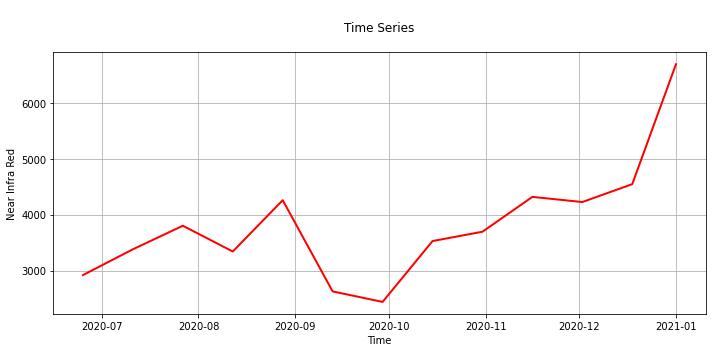

In [17]:
x = time_series.time
y = time_series

plt.figure(figsize=(10,5))
plt.title(f"\nTime Series\n")
plt.xlabel('Time')
plt.ylabel('Near Infra Red')
plt.plot(x, y, color="red", linewidth=2)
plt.tight_layout()
plt.grid()
plt.show()

In [26]:
_dir = "./large-data"
os.mkdir(_dir)

In [42]:
band = "EVI"
dates = list(eodatacube.data_images.keys())
total = len(dates)
item = 1
for date in dates:
    image = eodatacube.data_images[date]
    print(image.item.assets[band]["href"])
    image.item.assets[band].download(_dir)
    print(f"Download Complete {item}/{total} .......\n")
    item += 1
print("\nAll images downloaded!\n")

https://brazildatacube.dpi.inpe.br/data/d006/Mosaic/CB4_64_16D_STK/v001/021024/2021-01-01_2021-01-16/CB4_64_16D_STK_v001_021024_2021-01-01_2021-01-16_EVI.tif?access_token=a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV
Download Complete 1/13 .......

https://brazildatacube.dpi.inpe.br/data/d006/Mosaic/CB4_64_16D_STK/v001/021024/2020-12-18_2020-12-31/CB4_64_16D_STK_v001_021024_2020-12-18_2020-12-31_EVI.tif?access_token=a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV
Download Complete 2/13 .......

https://brazildatacube.dpi.inpe.br/data/d006/Mosaic/CB4_64_16D_STK/v001/021023/2020-12-02_2020-12-17/CB4_64_16D_STK_v001_021023_2020-12-02_2020-12-17_EVI.tif?access_token=a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV
Download Complete 3/13 .......

https://brazildatacube.dpi.inpe.br/data/d006/Mosaic/CB4_64_16D_STK/v001/021024/2020-11-16_2020-12-01/CB4_64_16D_STK_v001_021024_2020-11-16_2020-12-01_EVI.tif?access_token=a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV
Download Complete 4/13 .......

https://brazilda

In [80]:
lon=-46.4264242
lat=-14.8646209
tj = service.tj(latitude=lat, longitude=lon)

In [82]:
tj.trajectory[1]

{'class': 'Pastagem', 'collection': 'lapig_areas_pastagem', 'date': '1986'}

In [66]:
time_series.values[0], time_series.time[0]

(2920,
 <xarray.DataArray 'time' ()>
 array('2020-06-25T00:00:00.000000000', dtype='datetime64[ns]')
 Coordinates:
     time     datetime64[ns] 2020-06-25)